<a href="https://colab.research.google.com/github/ARYANSRIVATSAVA/Projects/blob/main/Letter_classification_with_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd

In [81]:
data=pd.read_csv('/content/train (1).csv',sep=",")
test_data = pd.read_csv('/content/test (1).csv',sep=",")

In [82]:
data.head(10)
test_data.head(5)

,U,4,10,6,7,9,9.1,6.1,4.1,3,6.2,7.1,7.2,9.2,8,5,6.3
0,N,6,9,8,4,3,8,7,3,4,13,5,8,6,8,0,8
1,V,6,9,8,8,10,7,7,5,4,7,6,8,7,9,7,10
2,I,5,6,6,4,3,7,6,2,7,7,6,9,0,9,4,8
3,N,5,9,7,6,4,9,7,3,5,10,4,6,5,8,1,7
4,H,5,8,8,6,6,5,8,3,6,10,8,8,4,8,4,6


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15999 entries, 0 to 15998
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T       15999 non-null  object
 1   2       15999 non-null  int64 
 2   8       15999 non-null  int64 
 3   3       15999 non-null  int64 
 4   5       15999 non-null  int64 
 5   1       15999 non-null  int64 
 6   8.1     15999 non-null  int64 
 7   13      15999 non-null  int64 
 8   0       15999 non-null  int64 
 9   6       15999 non-null  int64 
 10  6.1     15999 non-null  int64 
 11  10      15999 non-null  int64 
 12  8.2     15999 non-null  int64 
 13  0.1     15999 non-null  int64 
 14  8.3     15999 non-null  int64 
 15  0.2     15999 non-null  int64 
 16  8.4     15999 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.1+ MB


In [84]:
data.describe()

,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
count,15999.000000,15999.000000,15999.000000,15999.000000,15999.000000,15999.000000,15999.000000,15999.000000,15999.000000,15999.000000,15999.000000,15999.00000,15999.000000,15999.000000,15999.000000,15999.000000
mean,4.020314,7.028877,5.117445,5.365898,3.500281,6.892556,7.512095,4.627602,5.170323,8.286768,6.471029,7.92712,3.048941,8.343959,3.682230,7.796237
std,1.908496,3.304017,2.003253,2.262690,2.192250,2.029571,2.333537,2.711411,2.384930,2.485718,2.641996,2.07204,2.342430,1.550101,2.571304,1.603451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.00000,1.000000,8.000000,2.000000,7.000000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.00000,3.000000,8.000000,3.000000,8.000000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.00000,4.000000,9.000000,5.000000,8.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000


In [85]:
data.isnull().sum()

T      0
2      0
8      0
3      0
5      0
1      0
8.1    0
13     0
0      0
6      0
6.1    0
10     0
8.2    0
0.1    0
8.3    0
0.2    0
8.4    0
dtype: int64

In [86]:
data['T'].value_counts()

M    648
U    645
T    644
Y    641
D    638
P    635
A    633
B    630
V    628
X    628
F    622
N    617
E    616
Q    615
O    614
W    613
G    609
L    604
J    599
R    597
C    594
K    593
I    590
S    587
H    583
Z    576
Name: T, dtype: int64

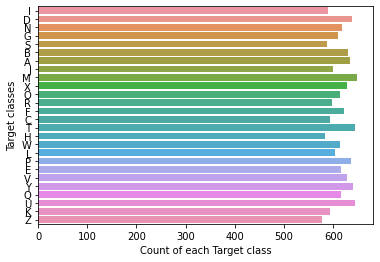

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(y = data['T'] ,data = data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [88]:
import numpy as np
np.var(data)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


2       3.642128
8      10.915848
3       4.012771
5       5.119447
1       4.805660
8.1     4.118901
13      5.445053
0       7.351288
6       5.687535
6.1     6.178405
10      6.979706
8.2     4.293082
0.1     5.486635
8.3     2.402662
0.2     6.611192
8.4     2.570894
dtype: float64

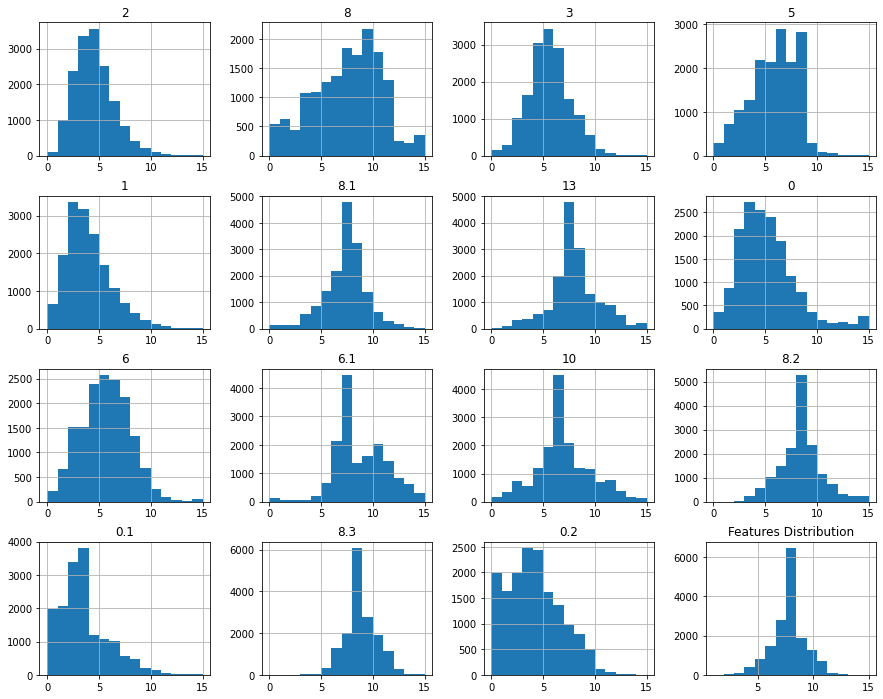

In [89]:
train_data = data.drop(columns=['T'])
train_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

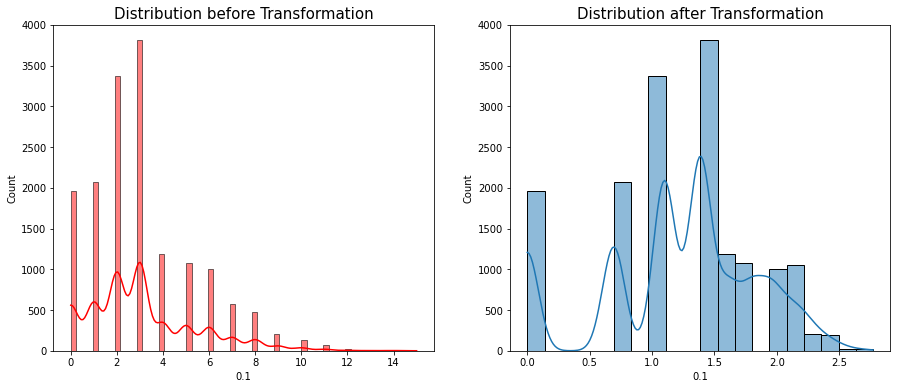

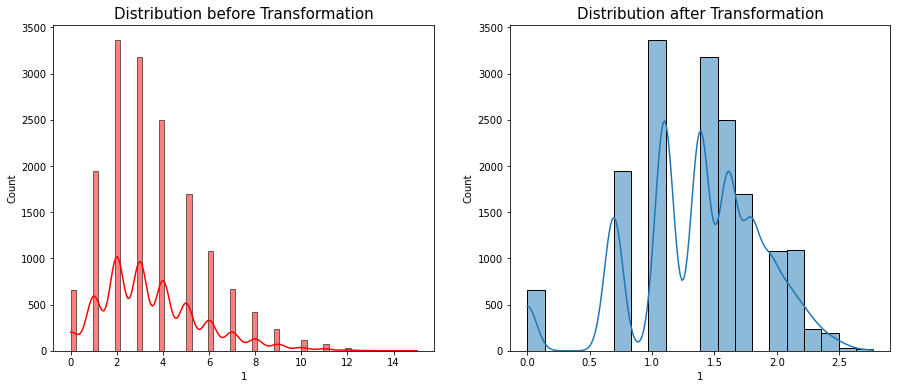

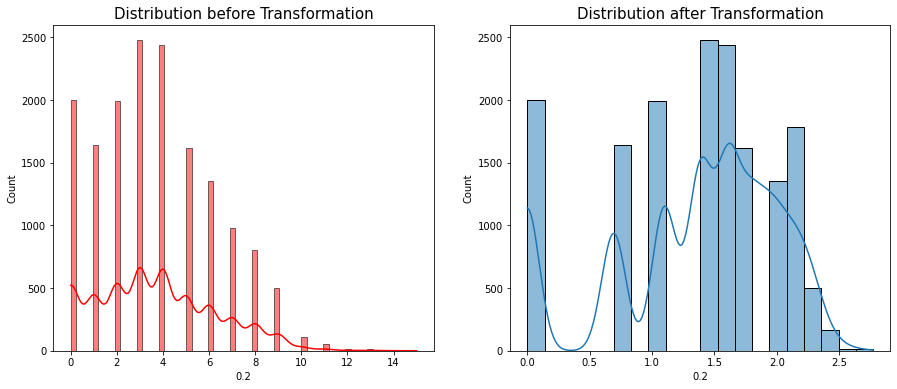

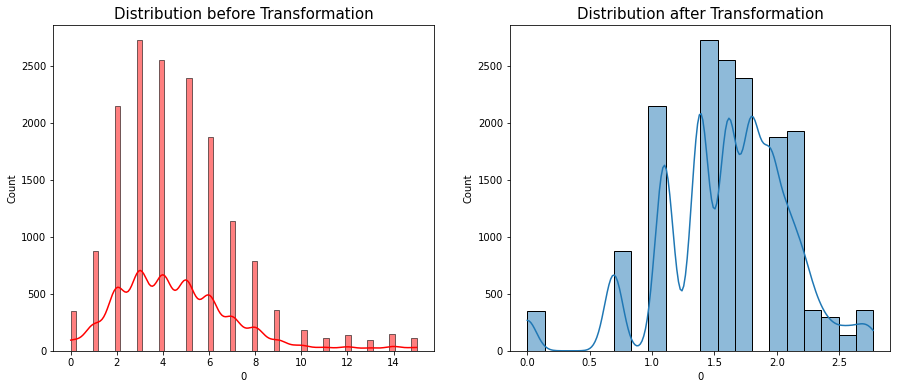

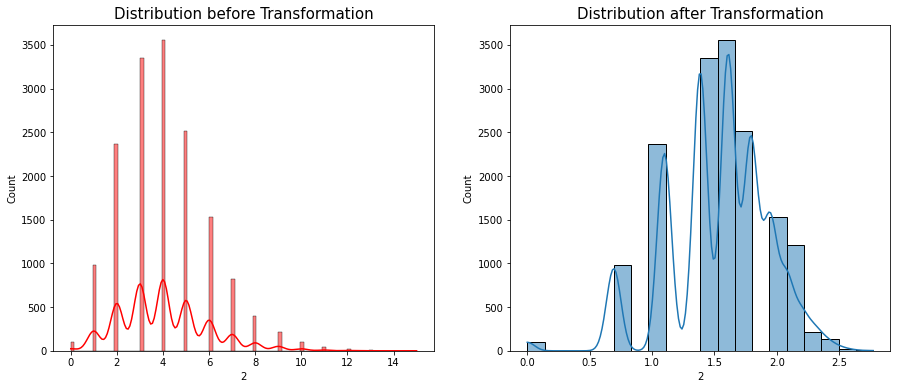

In [90]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
def logTrans(column):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [column])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(train_data[column], kde=True, color="red")
    plt.subplot(1,2,2)
    
    train_data[column] = pd.DataFrame(logTr.fit_transform(train_data))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(train_data[column],bins=20, kde=True , legend=False)
    plt.xlabel(column)
    plt.show()
    
    #print(f"Skewness was {round(old_skew[column],2)} before & is {round(df_log.skew()[0],2)} after Log transformation.")
    
logTrans(column="0.1")
logTrans(column="1")
logTrans(column="0.2")
logTrans(column="0")
logTrans(column="2")

In [91]:
def normalize(data):
    normalized_data = data.copy()
    for column in data.columns:
        max = data[column].max()
        min = data[column].min()
        normalized_data[column] = (data[column] - min) / (max - min)
    return normalized_data


In [92]:
datan=normalize(train_data)
datan

,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,0.646241,0.800000,0.200000,0.466667,0.396241,0.666667,0.333333,0.646241,0.266667,0.866667,0.200000,0.600000,0.396241,0.533333,0.580482,0.642857
1,0.580482,0.733333,0.400000,0.533333,0.701839,0.666667,0.400000,0.396241,0.400000,0.666667,0.200000,0.466667,0.500000,0.466667,0.500000,0.571429
2,0.750000,0.733333,0.400000,0.400000,0.500000,0.333333,0.600000,0.580482,0.400000,0.266667,0.266667,0.666667,0.701839,0.666667,0.396241,0.500000
3,0.396241,0.066667,0.200000,0.066667,0.250000,0.533333,0.400000,0.701839,0.400000,0.400000,0.333333,0.600000,0.250000,0.466667,0.646241,0.642857
4,0.580482,0.733333,0.333333,0.533333,0.500000,0.533333,0.533333,0.701839,0.600000,0.333333,0.400000,0.400000,0.000000,0.533333,0.830482,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,0.580482,0.600000,0.266667,0.400000,0.250000,0.000000,0.000000,0.701839,0.400000,0.000000,0.066667,0.333333,0.000000,0.533333,0.000000,0.500000
15995,0.580482,0.400000,0.400000,0.266667,0.701839,0.533333,0.400000,0.750000,0.200000,0.466667,0.333333,0.466667,0.580482,0.466667,0.750000,0.428571
15996,0.792481,0.933333,0.466667,0.533333,0.580482,0.533333,0.266667,0.646241,0.200000,0.533333,0.266667,0.333333,0.580482,0.466667,0.646241,0.500000
15997,0.580482,0.466667,0.333333,0.333333,0.500000,0.466667,0.466667,0.396241,0.600000,0.733333,0.400000,0.600000,0.396241,0.533333,0.646241,0.500000


In [93]:
data['T']= data['T'].str.replace('A', '0')     #Replacing '+' with 0
data['T']= data['T'].str.replace('B', '1') 
data['T']= data['T'].str.replace('C', '2')     #Replacing '+' with 0
data['T']= data['T'].str.replace('D', '3') 
data['T']= data['T'].str.replace('E', '4')     #Replacing '+' with 0
data['T']= data['T'].str.replace('F', '5') 
data['T']= data['T'].str.replace('G', '6')     #Replacing '+' with 0
data['T']= data['T'].str.replace('H', '7') 
data['T']= data['T'].str.replace('I', '8')     #Replacing '+' with 0
data['T']= data['T'].str.replace('J', '9') 
data['T']= data['T'].str.replace('K','10')     #Replacing '+' with 0
data['T']= data['T'].str.replace('L','11') 
data['T']= data['T'].str.replace('M','12')     #Replacing '+' with 0
data['T']= data['T'].str.replace('N','13') 
data['T']= data['T'].str.replace('O','14')     #Replacing '+' with 0
data['T']= data['T'].str.replace('P','15') 
data['T']= data['T'].str.replace('Q','16')     #Replacing '+' with 0
data['T']= data['T'].str.replace('R','17') 
data['T']= data['T'].str.replace('S','18')     #Replacing '+' with 0
data['T']= data['T'].str.replace('T','19') 
data['T']= data['T'].str.replace('U','20')     #Replacing '+' with 0
data['T']= data['T'].str.replace('V','21') 
data['T']= data['T'].str.replace('W','22')     #Replacing '+' with 0
data['T']= data['T'].str.replace('X','23') 
data['T']= data['T'].str.replace('Y','24')     #Replacing '+' with 0
data['T']= data['T'].str.replace('Z','25') 



In [94]:
data['T']=data['T'].astype('int')

In [95]:
data.info()
y = data['T']
print(train_data.shape)
y.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15999 entries, 0 to 15998
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   T       15999 non-null  int64
 1   2       15999 non-null  int64
 2   8       15999 non-null  int64
 3   3       15999 non-null  int64
 4   5       15999 non-null  int64
 5   1       15999 non-null  int64
 6   8.1     15999 non-null  int64
 7   13      15999 non-null  int64
 8   0       15999 non-null  int64
 9   6       15999 non-null  int64
 10  6.1     15999 non-null  int64
 11  10      15999 non-null  int64
 12  8.2     15999 non-null  int64
 13  0.1     15999 non-null  int64
 14  8.3     15999 non-null  int64
 15  0.2     15999 non-null  int64
 16  8.4     15999 non-null  int64
dtypes: int64(17)
memory usage: 2.1 MB
(15999, 16)


(15999,)

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.2,random_state=0)   

from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)


In [97]:
from sklearn.neural_network import MLPClassifier  
nnmodel = MLPClassifier(hidden_layer_sizes=(100,30),random_state=0)
nnmodel.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 30), random_state=0)

In [46]:
nnpredicted_class=nnmodel.predict(x_test)

from sklearn.metrics import accuracy_score 

accuracy_score(y_test,nnpredicted_class)

0.9596875

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold

param_grid = {
    'hidden_layer_sizes': [(150,100), (120,80), (100,50)],
    #'max_iter': [50, 100, 150],
    #'activation': ['tanh', 'relu'],
    #'solver': ['sgd', 'adam'],
    #'alpha': [0.0001, 0.05],
    #'learning_rate': ['constant','adaptive'],
}
grid = GridSearchCV(nnmodel, param_grid, n_jobs= -1, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_) 


{'hidden_layer_sizes': (150, 100)}


In [48]:
grid_predictions = grid.predict(x_test) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.96


In [60]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import scipy as sc
import random
import time
from sklearn.utils import shuffle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [74]:
l_encode = LabelEncoder()
l_encode.fit(y_train)
Y = l_encode.transform(y_train)
Y = to_categorical(y_train)
Y.shape
l_encode = LabelEncoder()
l_encode.fit(y_test)
T = l_encode.transform(y_test)
T = to_categorical(y_test)
T.shape

(3200, 26)

In [73]:
model = Sequential()
model.add(Dense(150, input_dim = 16, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
#model.add(Dense(100, activation = 'relu'))
#model.add(Dense(100, activation = 'relu'))
model.add(Dense(26, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(x_train,Y, epochs = 20, batch_size = 5)
scores = model.evaluate(x_test, T)

for i, m in enumerate(model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))


Epoch 1/20
2560/2560 [==============================] - 39s 2ms/step - loss: 0.9704 - accuracy: 0.7175
Epoch 2/20
2560/2560 [==============================] - 6s 2ms/step - loss: 0.4654 - accuracy: 0.8576
Epoch 3/20
2560/2560 [==============================] - 6s 2ms/step - loss: 0.3309 - accuracy: 0.8969
Epoch 4/20
2560/2560 [==============================] - 6s 2ms/step - loss: 0.2557 - accuracy: 0.9187
Epoch 5/20
2560/2560 [==============================] - 6s 2ms/step - loss: 0.2086 - accuracy: 0.9327
Epoch 6/20
2560/2560 [==============================] - 6s 2ms/step - loss: 0.1772 - accuracy: 0.9412
Epoch 7/20
2560/2560 [==============================] - 6s 2ms/step - loss: 0.1576 - accuracy: 0.9494
Epoch 8/20
2560/2560 [==============================] - 6s 2ms/step - loss: 0.1333 - accuracy: 0.9556
Epoch 9/20
2560/2560 [==============================] - 6s 2ms/step - loss: 0.1198 - accuracy: 0.9591
Epoch 10/20
2560/2560 [==============================] - 6s 2ms/step - loss: 0.10

In [49]:
#from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

#model = LogisticRegression()
model = RandomForestClassifier(n_estimators=100)

model.fit(train_data, y)


RandomForestClassifier()

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold

parameters = [{'criterion': ['entropy'],'max_depth':[5,10,20,50,100]}] 
best_fit = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           )
best_fit = best_fit.fit(x_train, y_train)
best_accuracy = best_fit.best_score_
best_parameters = best_fit.best_params_

print('Best accuracy: ',best_accuracy,end='\n')
print('Best parameters: ',best_parameters,end='\n')

Best accuracy:  0.9516367782825321
Best parameters:  {'criterion': 'entropy', 'max_depth': 50}
